In [1]:
import zipfile as zf

files = zf.ZipFile("hartattackdataset.zip",'r')
files.extractall()
files.close()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.dtypes


age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


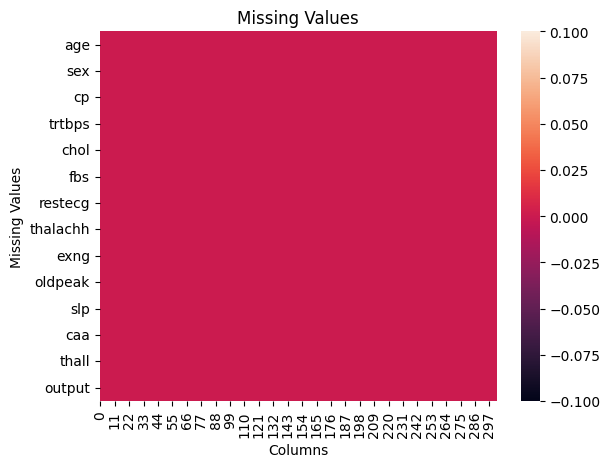

In [8]:
ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar=True, ax=ax)
plt.title('Missing Values', fontsize=12)
plt.xlabel('Columns', fontsize = 10) 
plt.ylabel('Missing Values', fontsize = 10)
plt.show()

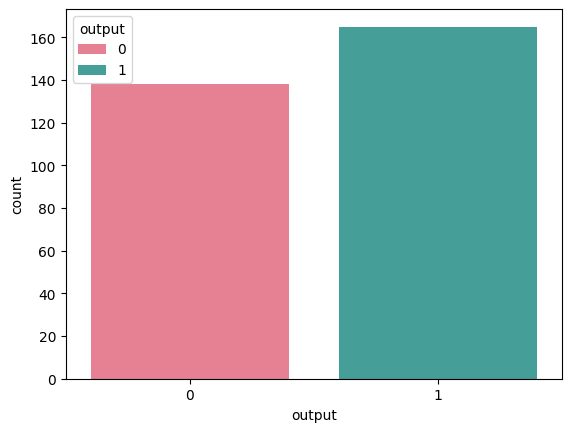

In [9]:

ax = sns.countplot(x="output", data=df ,palette=sns.color_palette("husl", 2), 
                  legend="brief", hue="output")

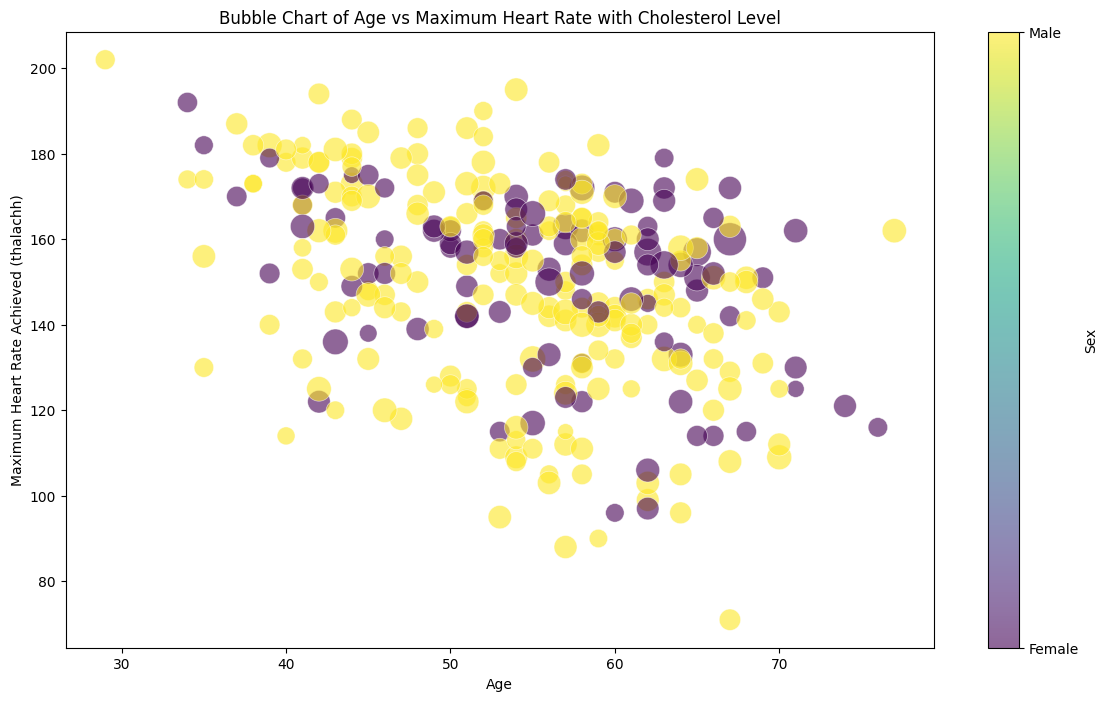

In [10]:
# Create the bubble chart
plt.figure(figsize=(14, 8))

# Scatter plot with varying sizes and colors
scatter = plt.scatter(
    df['age'], 
    df['thalachh'], 
    s=df['chol'] ,  # Adjusting the size for better visualization
    c=df['sex'], 
    cmap='viridis', 
    alpha=0.6, 
    edgecolors="w", 
    linewidth=0.5
)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved (thalachh)')
plt.title('Bubble Chart of Age vs Maximum Heart Rate with Cholesterol Level')

# Customizing the color bar
cbar = plt.colorbar(scatter)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Female', 'Male'])
cbar.set_label('Sex')

# Show the plot
plt.show()

In [11]:
# get the locations
X = df.drop('output', axis=1)
y = df['output']

In [12]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [13]:
y_test.size

61

In [14]:
# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the classifier
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [15]:
# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



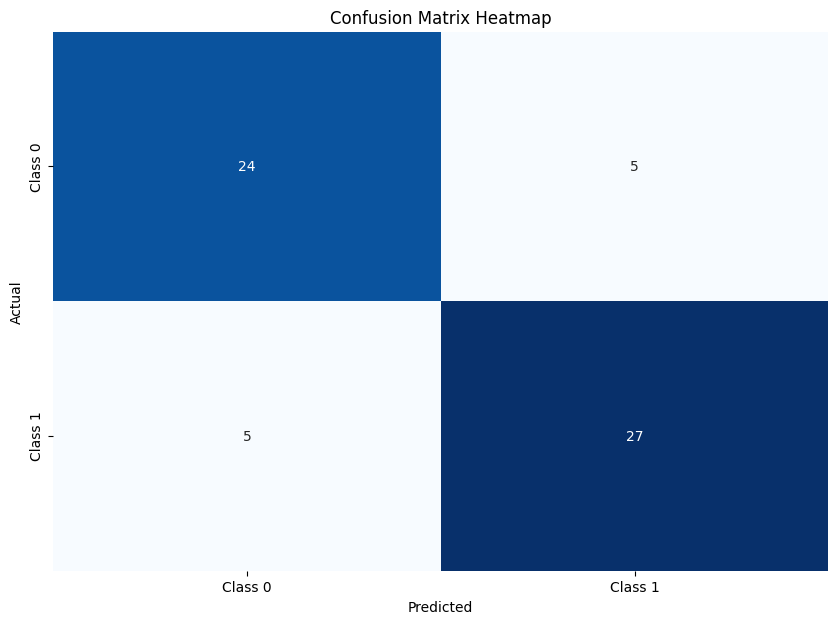

In [16]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [17]:
def learningC(model):
    train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(model, X, y,cv=5,
                    scoring='accuracy',n_jobs=-1)
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
    ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
    ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
    ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
    ax.set_xlabel('Data Range')
    ax.set_ylabel('Accuracy')
    ax.set_title('Learning Curve')
    plt.show()

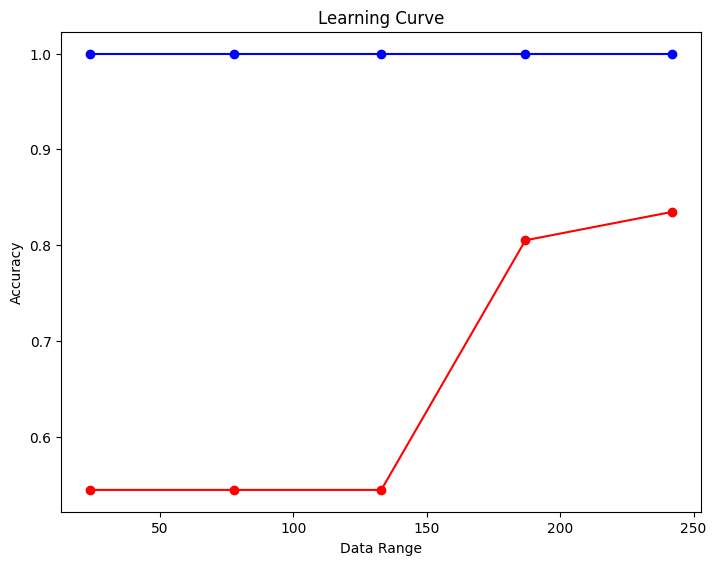

In [18]:
learningC(rf_clf)

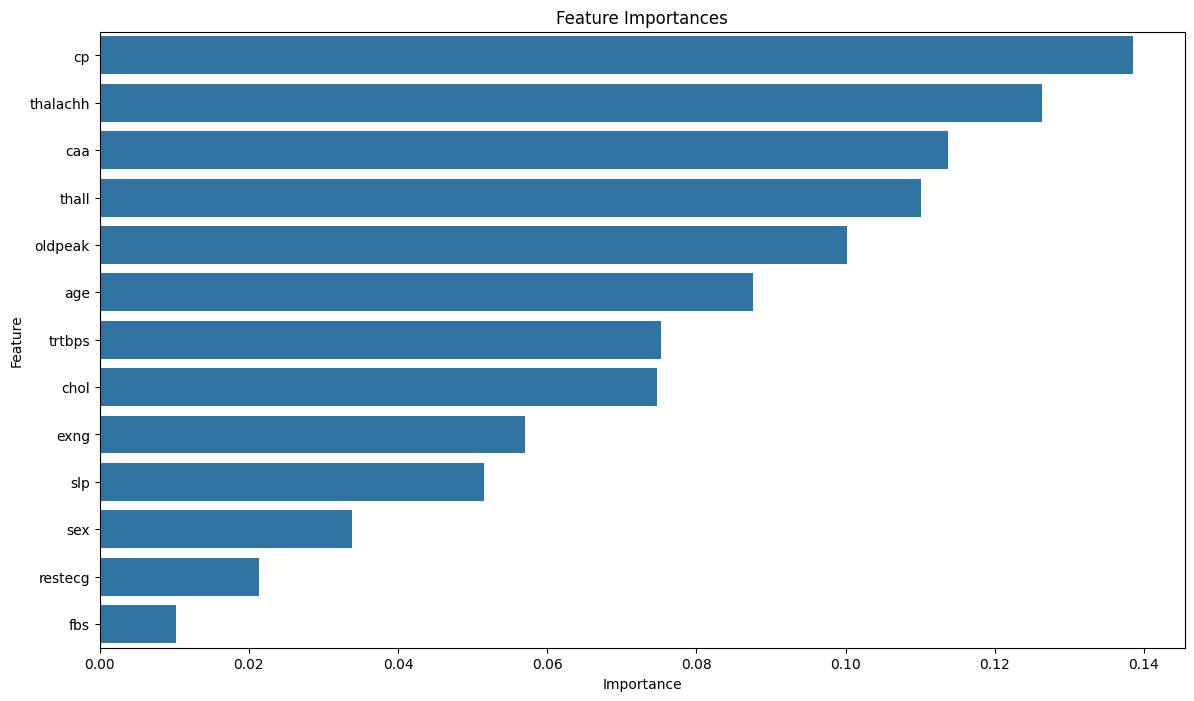

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

X = df.drop('output', axis=1)  
y = df['output']

# Initialize and fit the model
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X, y)

# Get feature importances
feature_importances = rf_clf.feature_importances_

# Create a DataFrame for visualization
features = X.columns.tolist()  # Extract column names
importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importances = importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importances')
plt.show()

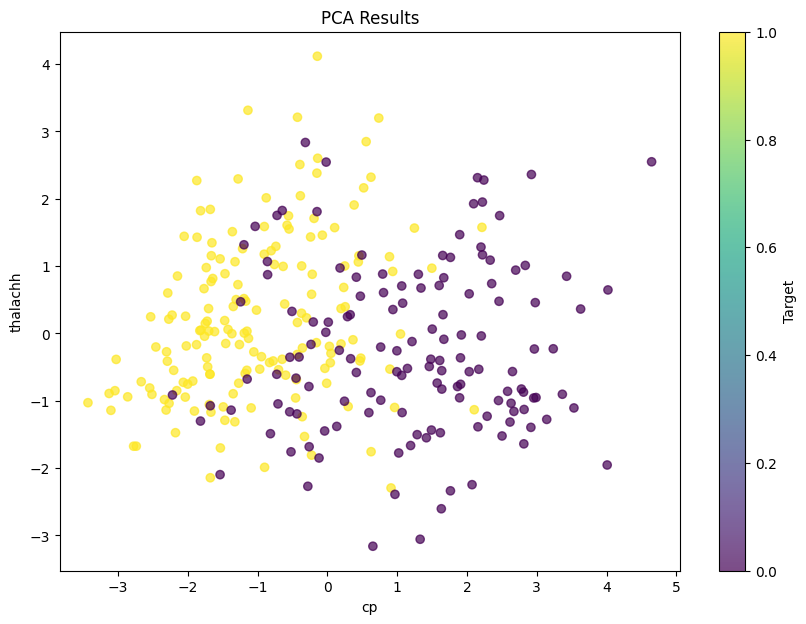

In [20]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['cp', 'thalachh'])
pca_df['target'] = y.values

# Plot PCA results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_df['cp'], pca_df['thalachh'], c=pca_df['target'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Target')
plt.xlabel('cp')
plt.ylabel('thalachh')
plt.title('PCA Results')
plt.show()

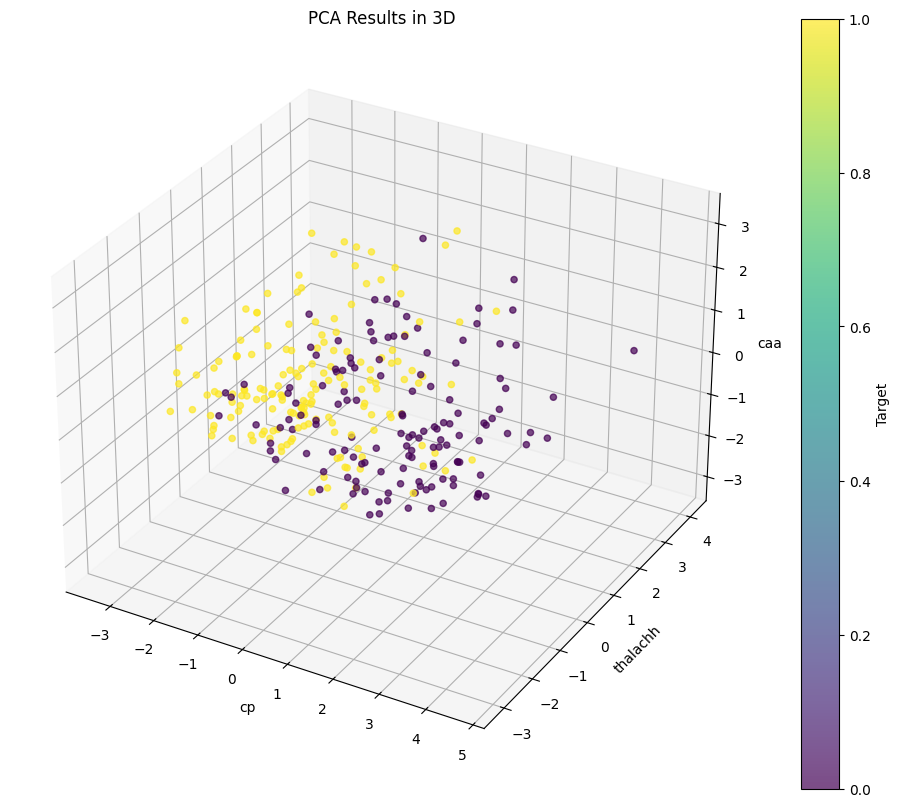

In [21]:
# Apply PCA
pca = PCA(n_components=3)  # Reduce to 3 dimensions for 3D visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['cp', 'thalachh', 'caa'])
pca_df['target'] = y.values

# Plot PCA results in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['cp'], pca_df['thalachh'], pca_df['caa'], c=pca_df['target'], cmap='viridis', alpha=0.7)
ax.set_xlabel('cp')
ax.set_ylabel('thalachh')
ax.set_zlabel('caa')
ax.set_title('PCA Results in 3D')
fig.colorbar(scatter, ax=ax, label='Target')
plt.show()

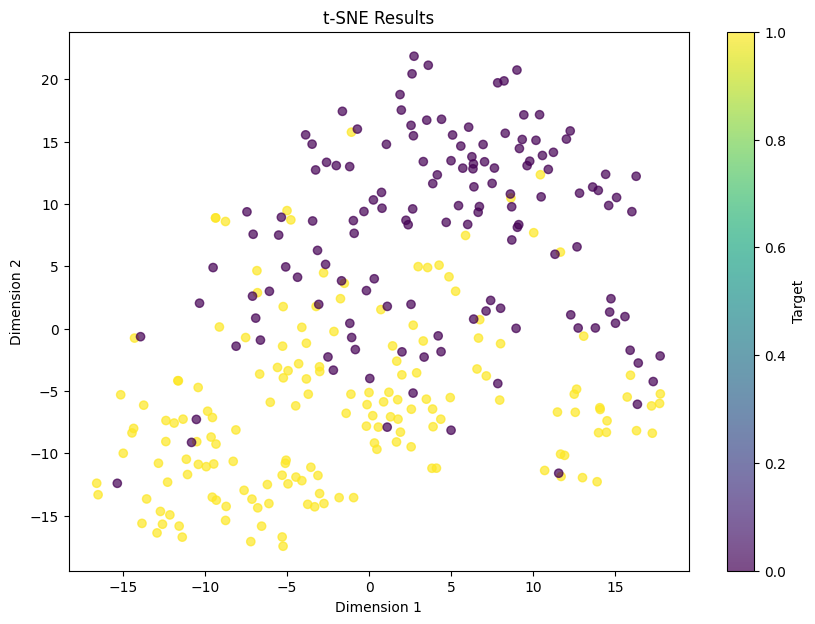

In [22]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions for visualization
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['target'] = y.values

# Plot t-SNE results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=tsne_df['target'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Target')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Results')
plt.show()

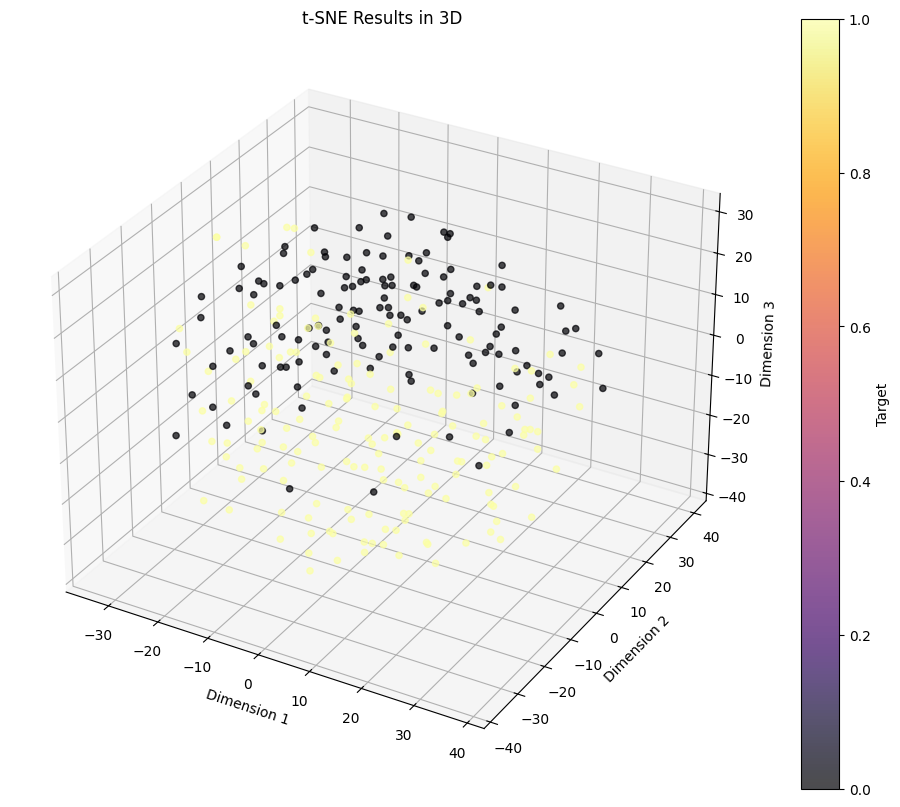

In [23]:
# Apply t-SNE
tsne = TSNE(n_components=3, random_state=42)  # Reduce to 3 dimensions for 3D visualization
X_tsne = tsne.fit_transform(X_scaled)
cmap = plt.get_cmap('inferno')  # Use 'plasma' colormap
# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
tsne_df['target'] = y.values

# Plot t-SNE results in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], tsne_df['Dimension 3'], c=tsne_df['target'], cmap='inferno', alpha=0.7)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('t-SNE Results in 3D')
fig.colorbar(scatter, ax=ax, label='Target')
plt.show()

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report



# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7049180327868853
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70        29
           1       0.73      0.69      0.71        32

    accuracy                           0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.71      0.70      0.71        61



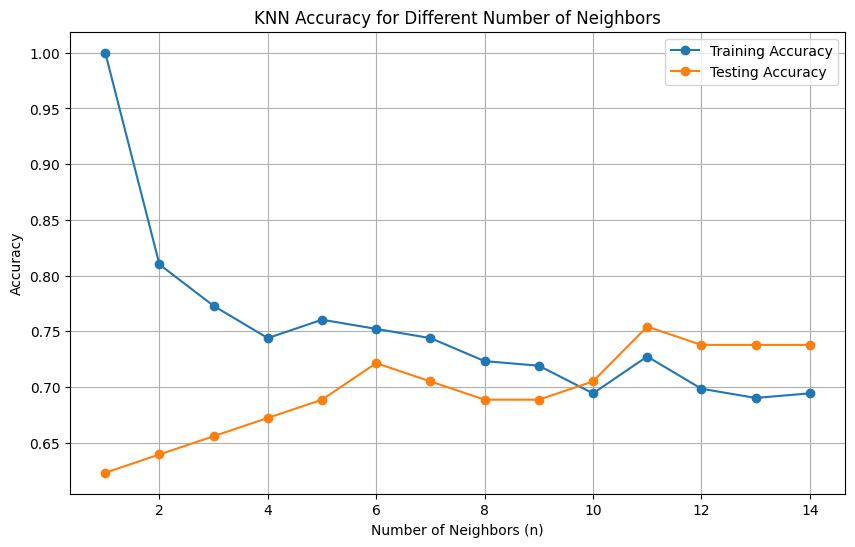

Best n_neighbors: 11 with accuracy: 0.7540983606557377


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



# Initialize variables to store the results
neighbors = range(1, 15)
train_accuracies = []
test_accuracies = []

# Loop through different values of n_neighbors
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training and test sets
    train_accuracy = accuracy_score(y_train, knn.predict(X_train))
    test_accuracy = accuracy_score(y_test, knn.predict(X_test))
    
    # Store the results
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(neighbors, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Number of Neighbors (n)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

# Find the best n_neighbors
best_n = neighbors[np.argmax(test_accuracies)]
best_accuracy = max(test_accuracies)
print(f'Best n_neighbors: {best_n} with accuracy: {best_accuracy}')


In [61]:
df2 = df.drop(['fbs', 'restecg'], axis=1)


In [62]:
# get the locations
X = df2.drop('output', axis=1)
y = df2['output']
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



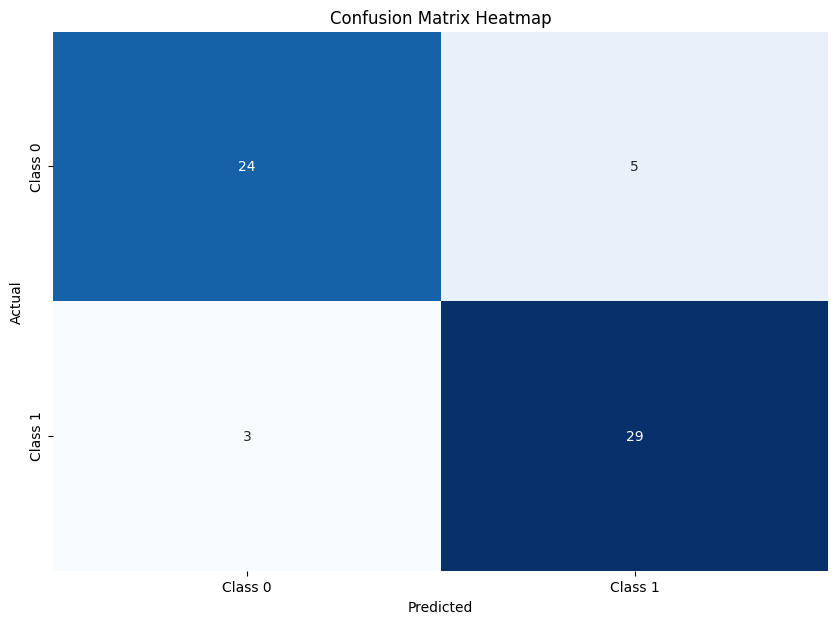

In [63]:
# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the classifier
rf_clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

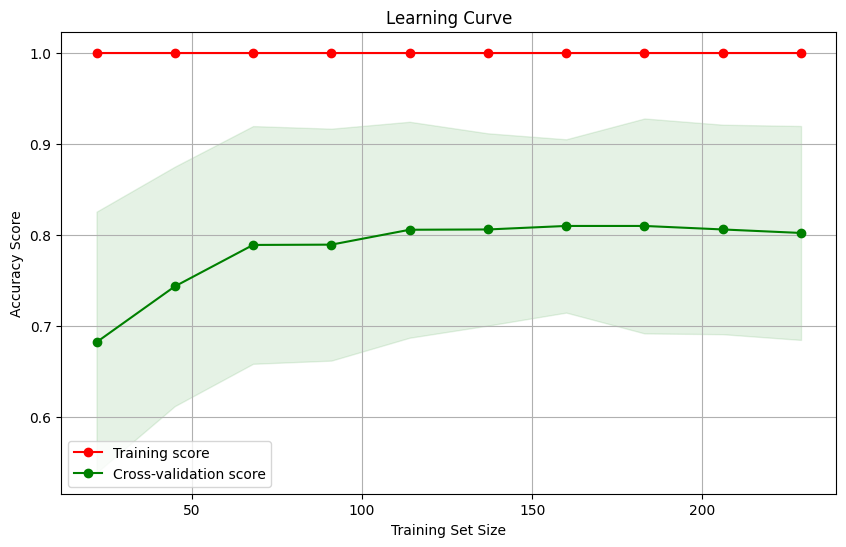

In [69]:


# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(rf_clf, X_train, y_train, cv=20, n_jobs=-2, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)

# Create plot
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()

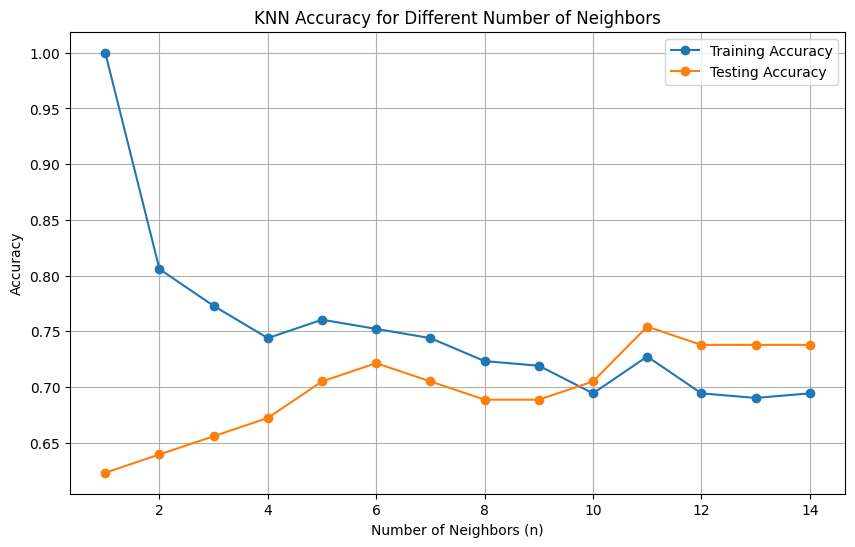

Best n_neighbors: 11 with accuracy: 0.7540983606557377


In [64]:
# Initialize variables to store the results
neighbors = range(1, 15)
train_accuracies = []
test_accuracies = []

# Loop through different values of n_neighbors
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training and test sets
    train_accuracy = accuracy_score(y_train, knn.predict(X_train))
    test_accuracy = accuracy_score(y_test, knn.predict(X_test))
    
    # Store the results
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(neighbors, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Number of Neighbors (n)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

# Find the best n_neighbors
best_n = neighbors[np.argmax(test_accuracies)]
best_accuracy = max(test_accuracies)
print(f'Best n_neighbors: {best_n} with accuracy: {best_accuracy}')


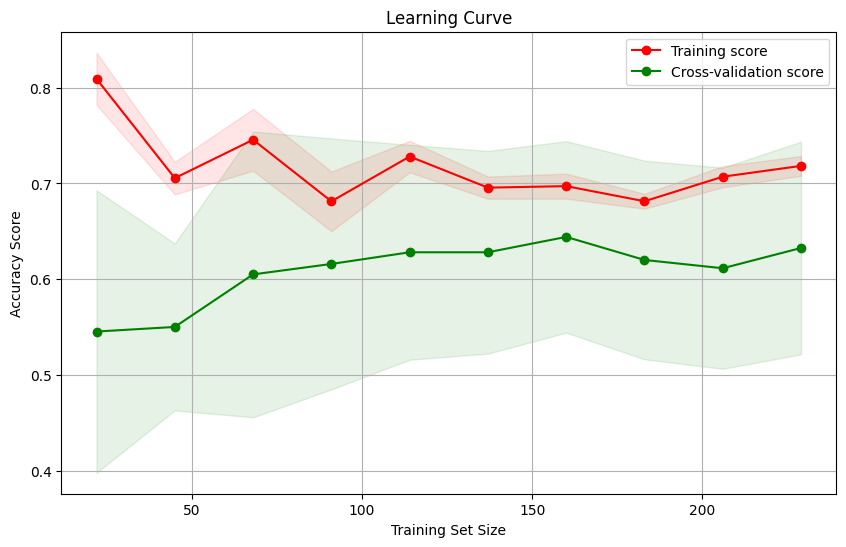

In [68]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=11)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=20, n_jobs=-2, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)

# Create plot
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()